In [7]:
import rootpy.ROOT as R
R.gROOT.SetBatch(True)
from rootpy.io import root_open, DoesNotExist
from rootpy.plotting import Canvas, Hist, Legend

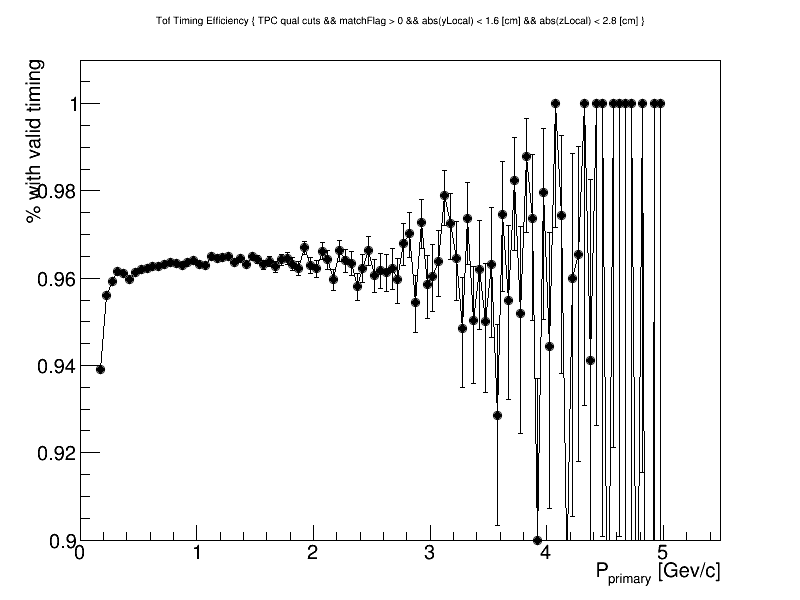

In [37]:
can = Canvas(width = 800, height = 600)

if None == f :
    f = root_open( "/Users/danielbrandenburg/bnl/local/data/RcpAnalysis/data/RcpPicoDst/fBeta.root" )

hBeta = f.Get( "hBeta" )

try :
    # see if it exists
    hTimingEff.GetEntries()
except NameError:
    hTimingEff = R.TH1F( "hTimingEff", "Timing Eff vs. p [GeV]", 100, 0, 5 )

hTotal = hBeta.ProjectionX( "hTotal" )
hTiming = hBeta.ProjectionX( "hTiming", 2, -1 )

eff = R.TGraphAsymmErrors()

eff.BayesDivide( hTiming, hTotal )

eff.Draw()
eff.GetYaxis().SetRangeUser( 0.9, 1.01 )
eff.SetTitle( "Tof Timing Efficiency { TPC qual cuts && matchFlag > 0 && abs(yLocal) < 1.6 [cm] && abs(zLocal) < 2.8 [cm] }; P_{primary} [Gev/c]; % with valid timing" )

can.Print( "Tof_Timing_eff.pdf" )
can.Print( "Tof_Timing_eff.eps" )
can.Print( "Tof_Timing_eff.png" )
can